In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from labellines import labelLine, labelLines

In [3]:
data_N200M30 = pd.read_csv('./raw_data/NIFTY200Momentum30.csv')[::-1]
data_N50 = pd.read_csv('./raw_data/NIFTY50.csv')[::-1]
data_NN50 = pd.read_csv('./raw_data/NIFTY_NEXT50.csv')[::-1]
data_ALowVol = pd.read_csv('./raw_data/NIFTY_ALPHALOWVOL.csv')[::-1]
data_M150Q50 = pd.read_csv('./raw_data/NIFTY_MIDCAP150_QUALITY50.csv')[::-1]
data_N100LowVol30 = pd.read_csv('./raw_data/NIFTY100_LOWVOL30.csv')[::-1]

In [4]:
# Factor indices start at 1000 on 1-Apr-2005
# We convert N50 & NN50 series to start from base of 1000 on 1-Apr-2005 to be comparable on the same chart

data_N50.at[len(data_N50)-1, 'NEW_BASE'] = 1000
data_NN50.at[len(data_NN50)-1, 'NEW_BASE'] = 1000

data_N50['pct_change'] = data_N50.Close.pct_change()
data_NN50['pct_change'] = data_NN50.Close.pct_change()

for i in reversed(range(0, len(data_N50)-1)):
    data_N50.loc[i, 'NEW_BASE'] = data_N50.loc[i+1, 'NEW_BASE'] * (1 + data_N50.loc[i, 'pct_change'])

for j in reversed(range(0, len(data_NN50)-1)):
    data_NN50.loc[j, 'NEW_BASE'] = data_NN50.loc[j+1, 'NEW_BASE'] * (1 + data_NN50.loc[j, 'pct_change'])

In [8]:
def plot_rolling_returns(years, title=''):
    days = 248  # avg. # of trading days in a year

    data_N200M30['NIFTY200Momentum30'] = data_N200M30.Close.rolling(days * years).mean()  
    data_N50['NIFTY50'] = data_N50.NEW_BASE.rolling(days * years).mean()  
    data_NN50['NIFTY_NEXT50'] = data_NN50.NEW_BASE.rolling(days * years).mean()  
    data_ALowVol['NIFTY_ALPHALOWVOL'] = data_ALowVol.Close.rolling(days * years).mean()  
    data_M150Q50['NIFTY_MIDCAP150_QUALITY50'] = data_M150Q50.Close.rolling(days * years).mean()  
    data_N100LowVol30['NIFTY100_LOWVOL30'] = data_N100LowVol30.Close.rolling(days * years).mean()  

    ax = data_N200M30.plot.line(x='Date', y='NIFTY200Momentum30', figsize=(25,15), title=title)
    data_N50.plot.line(x='Date', y='NIFTY50', ax=ax)
    data_NN50.plot.line(x='Date', y='NIFTY_NEXT50', ax=ax)
    data_ALowVol.plot.line(x='Date', y='NIFTY_ALPHALOWVOL', ax=ax)
    data_M150Q50.plot.line(x='Date', y='NIFTY_MIDCAP150_QUALITY50', ax=ax)
    data_N100LowVol30.plot.line(x='Date', y='NIFTY100_LOWVOL30', ax=ax)
    ax.labelsize = 'large'
    
    labelLines(plt.gca().get_lines(), zorder=5.5)

In [37]:
print('------------------------------ Volatility (Descending) ------------------------------')
print('NIFTY NEXT50               => ' + str(data_NN50.Close.pct_change().std() * 252 ** 0.5))
print('NIFTY 200 Momentum 30      => ' + str(data_N200M30.Close.pct_change().std() * 252 ** 0.5))
print('NIFTY 50                   => ' + str(data_N50.Close.pct_change().std() * 252 ** 0.5))
print('NIFTY100 LOWVOL30          => ' + str(data_N100LowVol30.Close.pct_change().std() * 252 ** 0.5))
print('NIFTY ALPHA LOW VOL        => ' + str(data_ALowVol.Close.pct_change().std() * 252 ** 0.5))
print('NIFTY MIDCAP150 QUALITY50  => ' + str(data_M150Q50.Close.pct_change().std() * 252 ** 0.5))
print('-------------------------------------------------------------------------------------')

------------------------------ Volatility (Descending) ------------------------------
NIFTY NEXT50               => 0.24055981749207783
NIFTY 200 Momentum 30      => 0.23130497386699359
NIFTY 50                   => 0.22356064546339216
NIFTY100 LOWVOL30          => 0.1803447987680543
NIFTY ALPHA LOW VOL        => 0.18212595745953156
NIFTY MIDCAP150 QUALITY50  => 0.18398111537292478
-------------------------------------------------------------------------------------


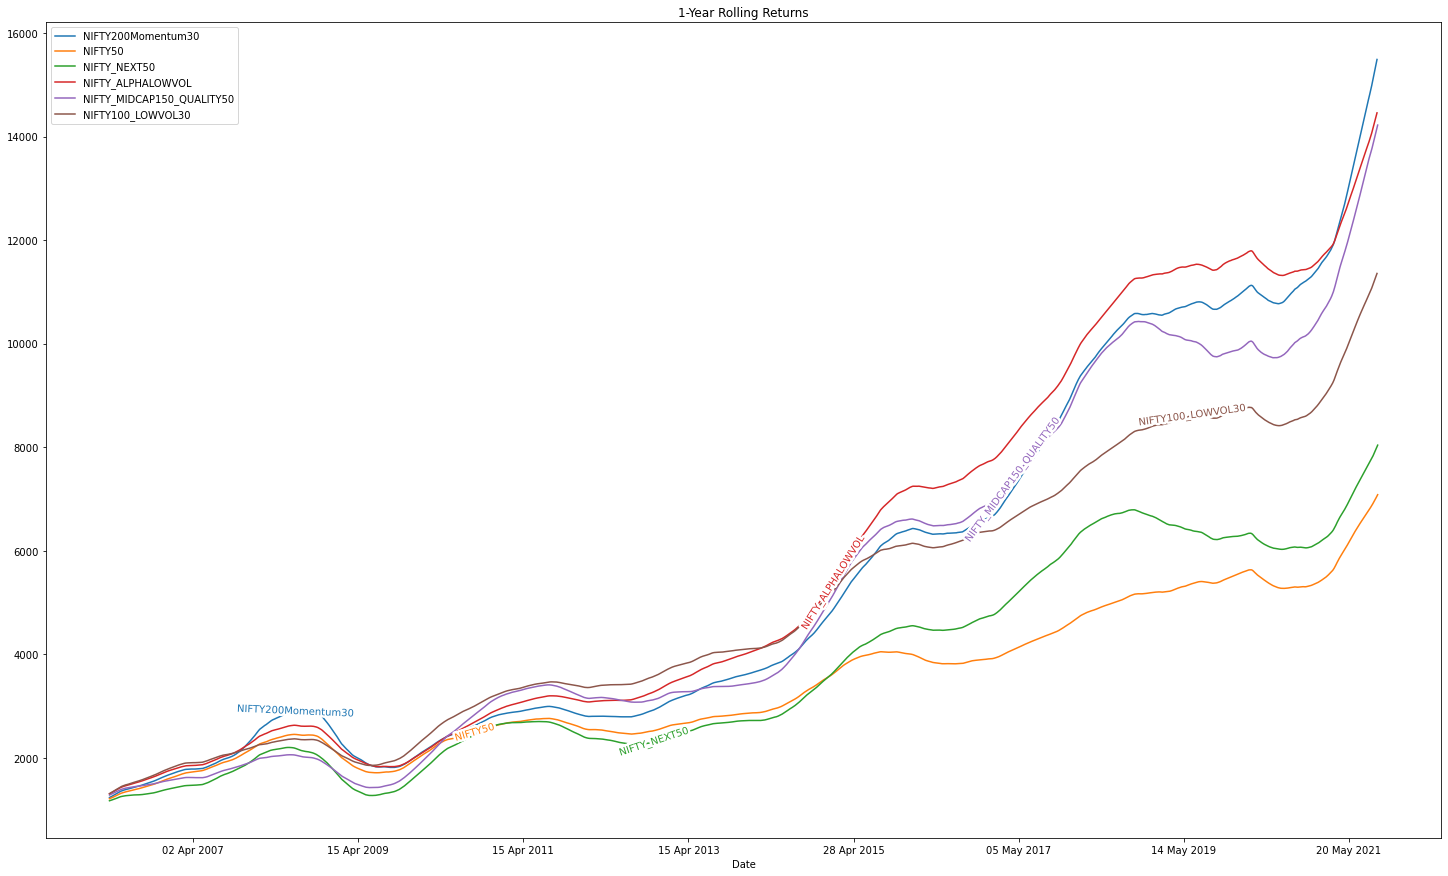

In [11]:
plot_rolling_returns(years=1, title='1-Year Rolling Returns')

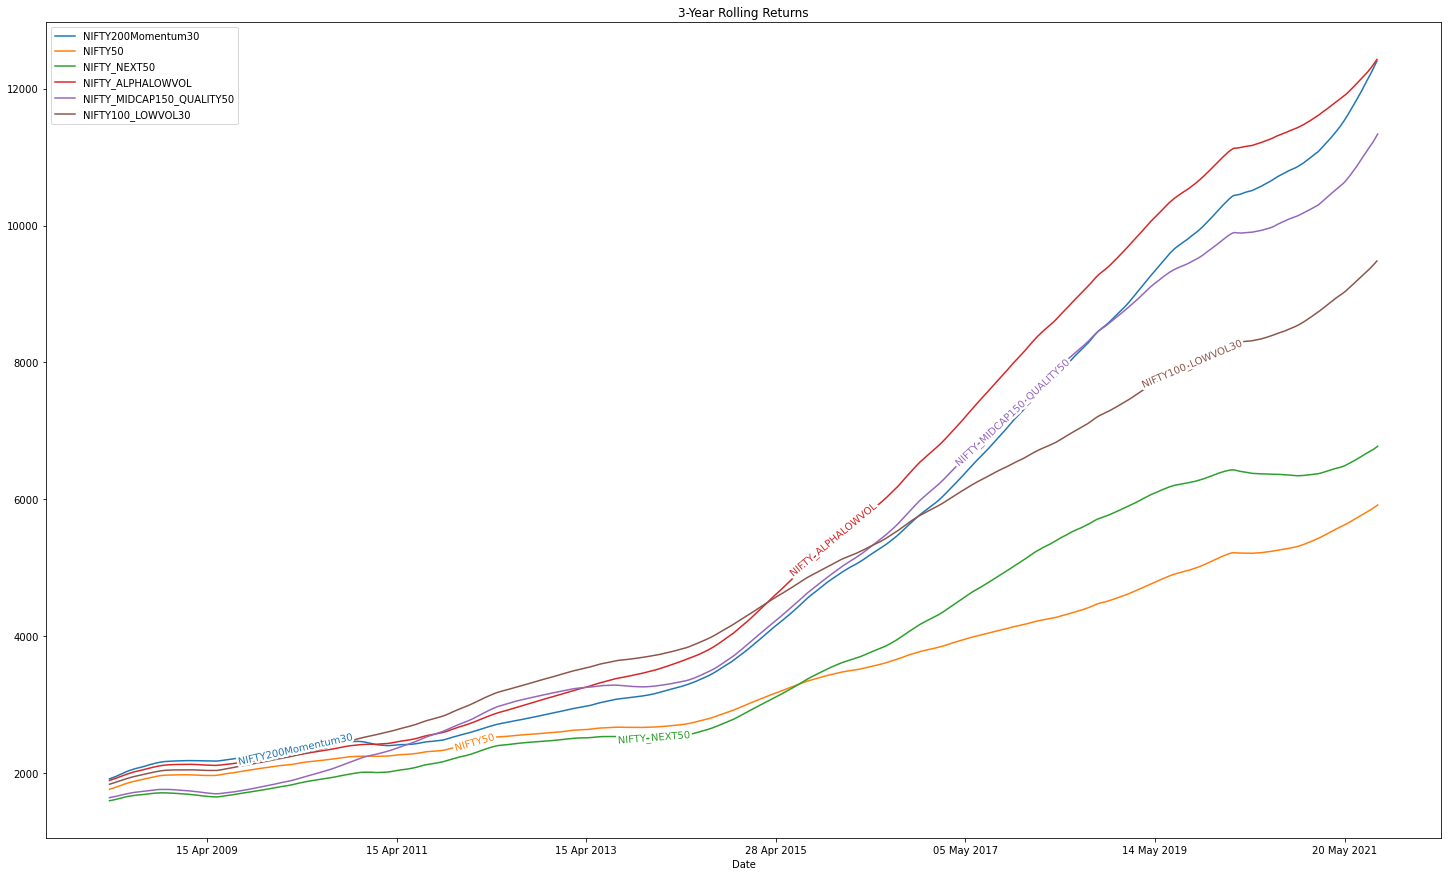

In [10]:
plot_rolling_returns(years=3, title='3-Year Rolling Returns')

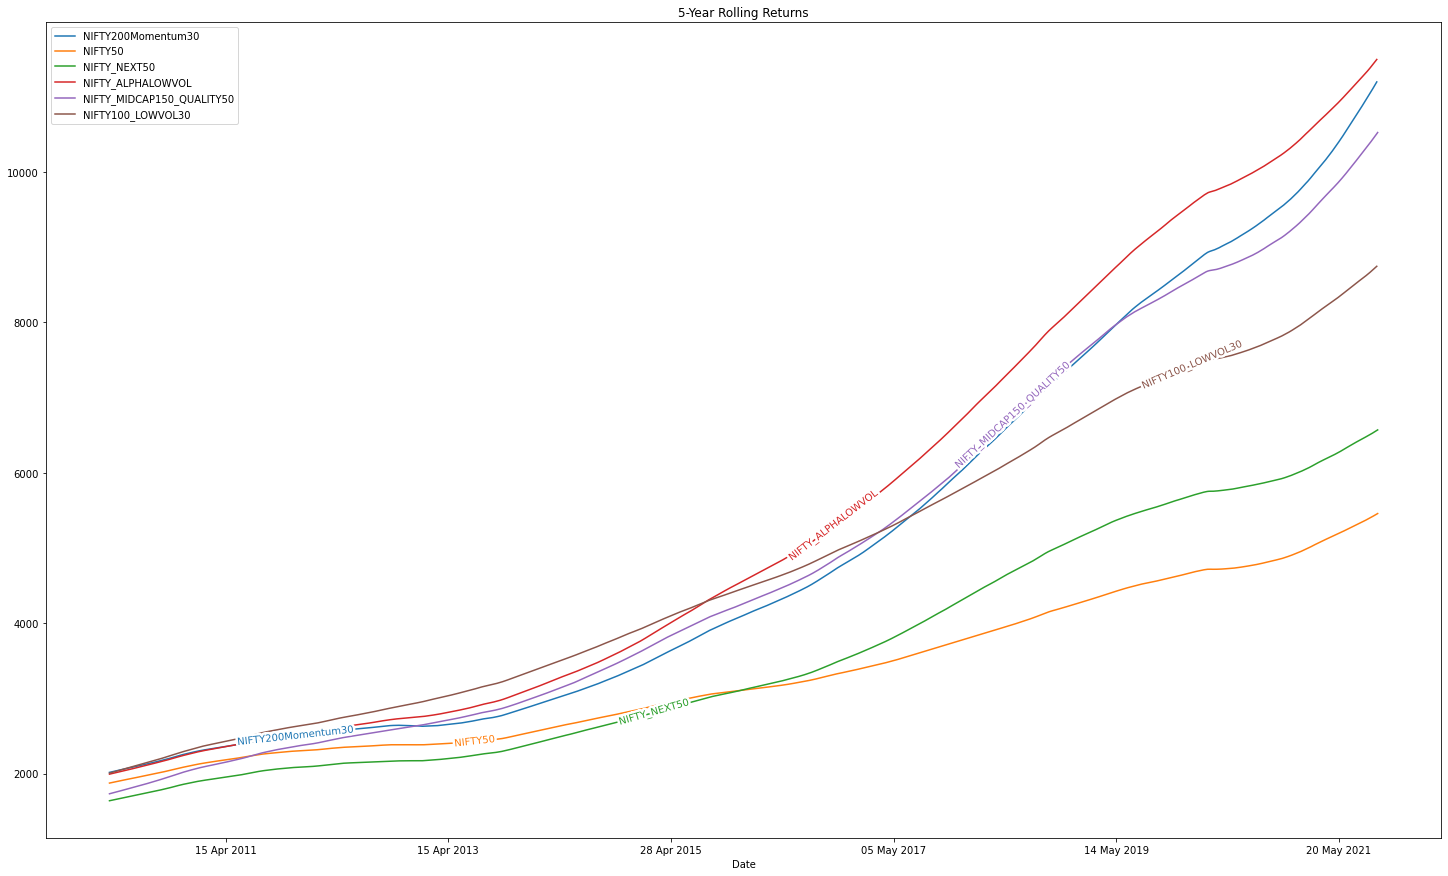

In [12]:
plot_rolling_returns(years=5, title='5-Year Rolling Returns')

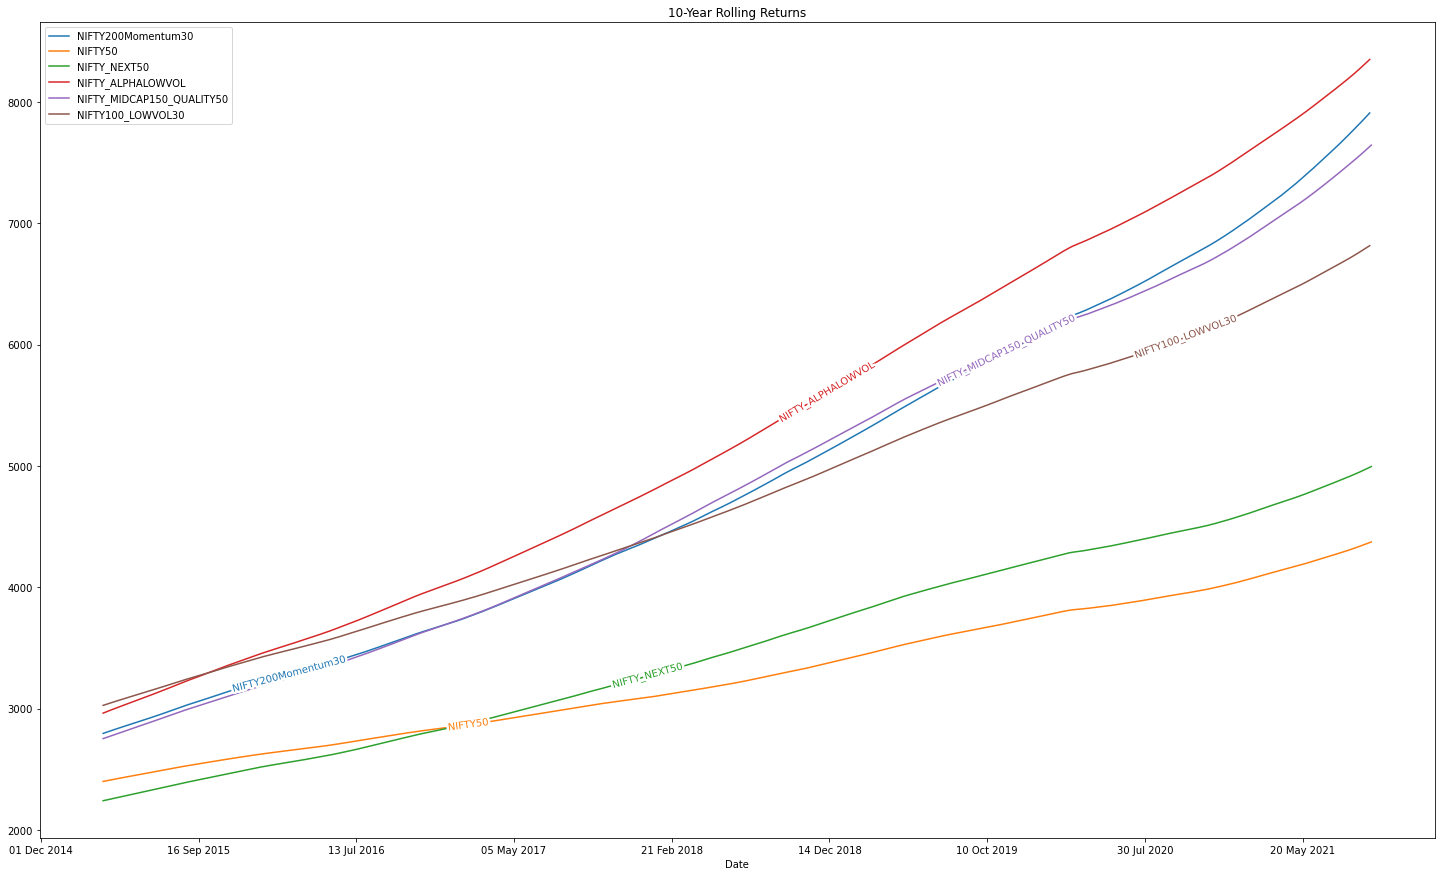

In [13]:
plot_rolling_returns(years=10, title='10-Year Rolling Returns')

[None, None, None, None, None, None]

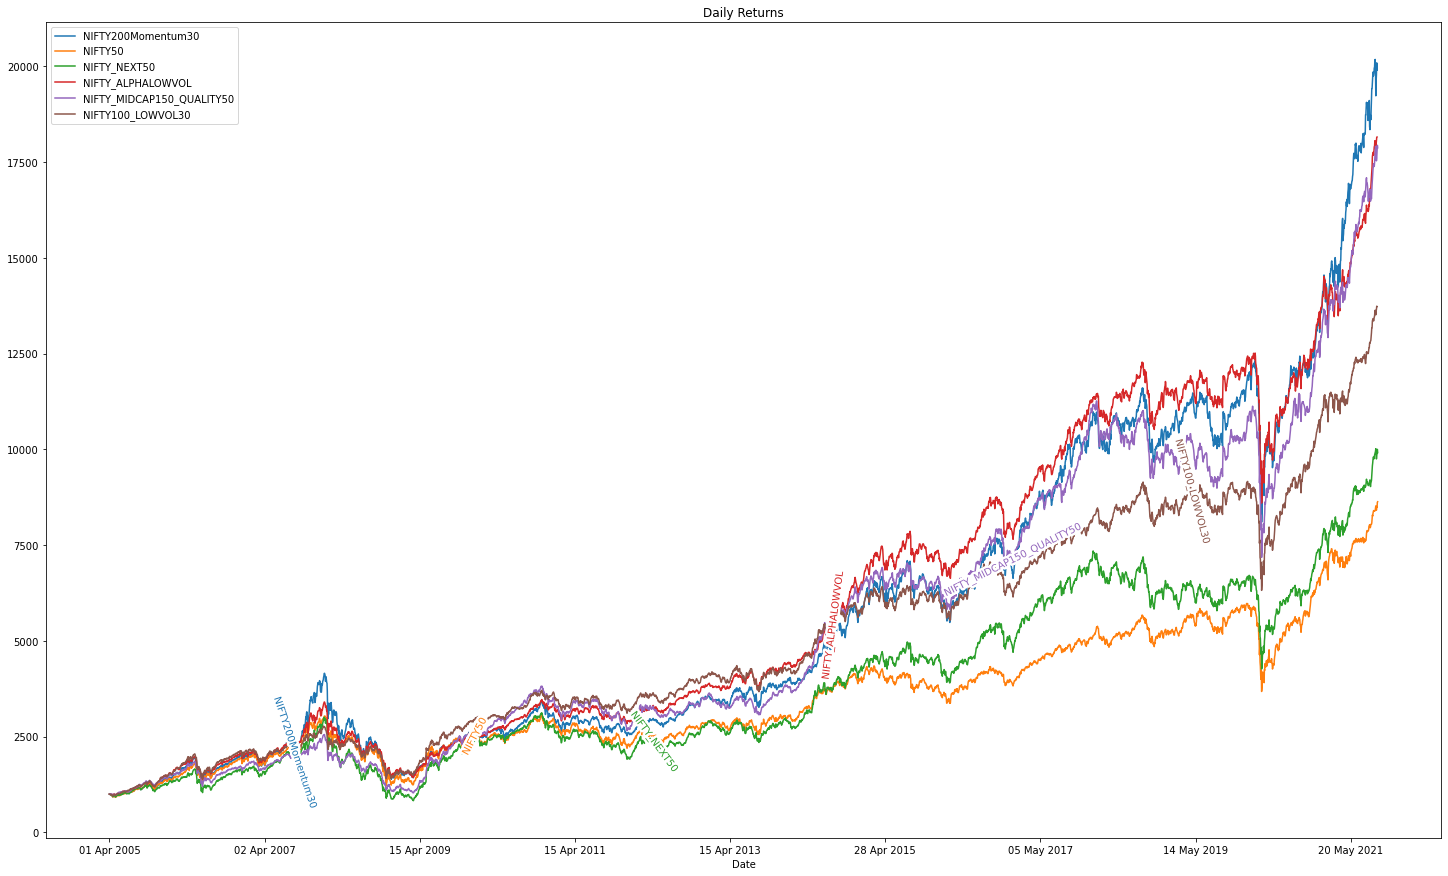

In [14]:
data_N200M30['NIFTY200Momentum30'] = data_N200M30.Close
data_N50['NIFTY50'] = data_N50.NEW_BASE
data_NN50['NIFTY_NEXT50'] = data_NN50.NEW_BASE
data_ALowVol['NIFTY_ALPHALOWVOL'] = data_ALowVol.Close 
data_M150Q50['NIFTY_MIDCAP150_QUALITY50'] = data_M150Q50.Close
data_N100LowVol30['NIFTY100_LOWVOL30'] = data_N100LowVol30.Close

ax = data_N200M30.plot.line(x='Date', y='NIFTY200Momentum30', figsize=(25,15), title='Daily Returns')
data_N50.plot.line(x='Date', y='NIFTY50', ax=ax)
data_NN50.plot.line(x='Date', y='NIFTY_NEXT50', ax=ax)
data_ALowVol.plot.line(x='Date', y='NIFTY_ALPHALOWVOL', ax=ax)
data_M150Q50.plot.line(x='Date', y='NIFTY_MIDCAP150_QUALITY50', ax=ax)
data_N100LowVol30.plot.line(x='Date', y='NIFTY100_LOWVOL30', ax=ax)
ax.labelsize = 'large'

labelLines(plt.gca().get_lines(), zorder=5.5)